In [16]:
import pandas as pd
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
# Read data
DATA_BASE_URL = "https://raw.githubusercontent.com/sql-injection/spotify_data/master/"
datasets = {
    "train": DATA_BASE_URL + "train.csv",
    "test": DATA_BASE_URL + "test.csv",
    "all": DATA_BASE_URL + "spotify.csv"
}

total_df = pd.read_csv(datasets["all"])
attribute_names = list(total_df)[:-1]
x = total_df[attribute_names].values
y = total_df["Class"].values

original_x = np.copy(x)
original_y = np.copy(y)

In [18]:
def include_only(x, attribute_names, attribute_subset):
    excluded_columns = [i for i, attribute in enumerate(attribute_names) if attribute not in attribute_subset]
    return np.delete(x, excluded_columns, axis=1)

In [19]:
attribute_subset = ["danceability", "energy"]
print("Attributes we are considering:", attribute_subset)
x = include_only(original_x, attribute_names, attribute_subset)

Attributes we are considering: ['danceability', 'energy']


In [20]:
feature_a_indices =  np.where(y == "classical")[0]
feature_b_indices = np.where(y == "rock")[0]
feature_a_color = "cornflowerblue";
feature_b_color = "salmon";

attribute_names = np.array(attribute_names)
energy_attribute_index = np.where(attribute_names == "energy")[0][0]
danceability_attribute_index = np.where(attribute_names == "danceability")[0][0]

In [21]:
X = np.concatenate((x[feature_a_indices], x[feature_b_indices]))

In [28]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

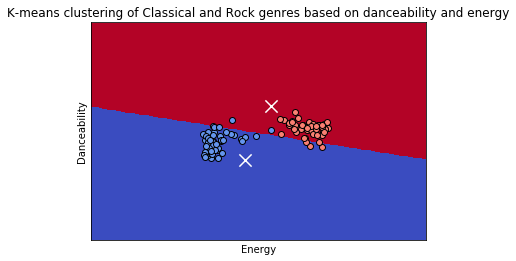

Genre labels were retroactively added after the KMeans learner was fit


In [30]:
step_size = .01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z,
           interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.get_cmap("coolwarm"),
           aspect="auto", origin="lower")

for i in feature_a_indices:
    plt.scatter(original_x[i, energy_attribute_index],
                original_x[i, danceability_attribute_index],
                color=feature_a_color, edgecolor='k')
    
for i in feature_b_indices:
    plt.scatter(original_x[i, energy_attribute_index],
                original_x[i, danceability_attribute_index],
                color=feature_b_color, edgecolor='k')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=150, linewidths=10,
            color='w')

plt.title("K-means clustering of Classical and Rock genres based on danceability and energy")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
print("Genre labels were retroactively added after the KMeans learner was fit")